## Aims:
Differentiate various organs in the mask

In [2]:
import torch
import torch.nn as nn
from pathlib import Path
import numpy as np
import random
from shutil import copyfile
import os

import torch
import torch.nn as nn
from pathlib import Path
import numpy as np
import random
from shutil import copyfile
import os

# Set the random seed for reproducibility
random.seed(2056)

# Read all files ending with _img.nii
img_path = Path("data/data")
img_files = list(img_path.glob("*_img.nii")) # Image and mask are in the same folder
num_images = len(img_files) 

# Create train, validation and test splits
train_split = int(0.7 * num_images)
val_split = int(0.15 * num_images)
test_split = int(num_images - (train_split + val_split))

# Shuffle the image files
random.shuffle(img_files)

# Split the dataset
train_images = img_files[:train_split]
val_images = img_files[train_split:(train_split + val_split)]
test_images = img_files[(train_split + val_split): ]

# Create train, validation and test directories
train_image_dir = Path(img_path / "train_images")
train_mask_dir = Path(img_path / "train_masks")
val_image_dir = Path(img_path / "val_images")
val_mask_dir = Path(img_path / "val_masks")
test_image_dir = Path(img_path / "test_images")
test_mask_dir = Path(img_path / "test_masks")

# Create the directories if they don't exist
if not os.path.exists(train_image_dir) and not os.path.exists(train_mask_dir) and not os.path.exists(val_image_dir) and not os.path.exists(val_mask_dir) and not os.path.exists(test_image_dir) and not os.path.exists(test_mask_dir):
    for directory in [train_image_dir, train_mask_dir, val_image_dir, val_mask_dir, test_image_dir, test_mask_dir]:
        directory.mkdir(exist_ok = True, parents = True)

    # Copy the images and their corresponding segmentation masks to their respective directories
    for directory, images in zip([train_image_dir, val_image_dir, test_image_dir], [train_images, val_images, test_images]):
        for image in images:
            # Copy image
            copyfile(image, directory / image.name)

            # Get corresponding segmentation mask
            mask = image.name.replace("_img.nii", "_mask.nii")

            # Copy segmentation mask
            copyfile(image.parent / mask, image.parent / directory.name.replace("images", "masks") / mask)


# # Sanity check
# train_images_s = list(train_image_dir.glob("*"))
# train_images_s = [image.name.removesuffix("_img.nii") for image in train_images_s]
# train_masks_s = list(train_mask_dir.glob("*"))
# train_masks_s = [mask.name.removesuffix("_mask.nii") for mask in train_masks_s]
# train_images_s == train_masks_s








### From the data page, there are 8 regions of interest i.e including bladder, bone, neurovascular bundle, obturator internus,  zone, rectum, seminal vesicle, transition zone and peripheral zone. So 8 images of interest + background we should expect 9 unique values in the masks

In [68]:
import nibabel as nib
import matplotlib.pyplot as plt
import pandas as pd

# Read train images and masks
train_images = list(train_image_dir.glob("*"))
train_masks = list(train_mask_dir.glob("*"))

# Find images with full masks
full_masks = []
for index, mask in enumerate(train_masks):
    mask = nib.load(mask).get_fdata()
    mask = torch.from_numpy(mask)
    for i in range(mask.shape[2]):
        msk = mask[:, :, i]
        if torch.unique(msk).shape[0] == 9:
            full_masks.append(index)
            break

full_masks


[1,
 28,
 30,
 67,
 69,
 81,
 89,
 110,
 124,
 130,
 167,
 193,
 206,
 209,
 223,
 248,
 251,
 294,
 323,
 373,
 380,
 386,
 397]

36


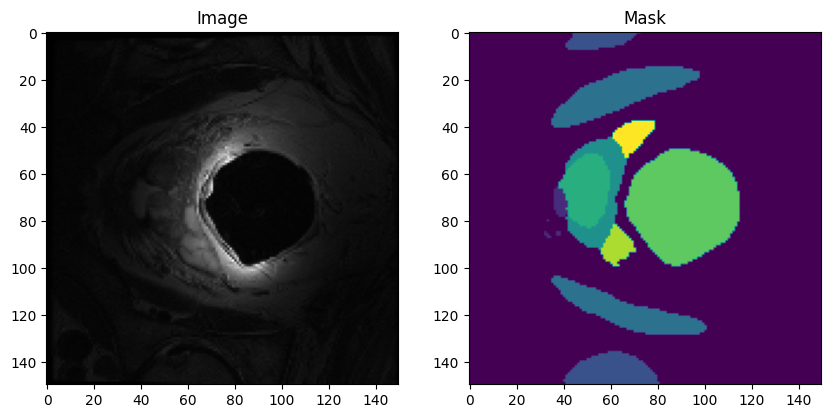

37


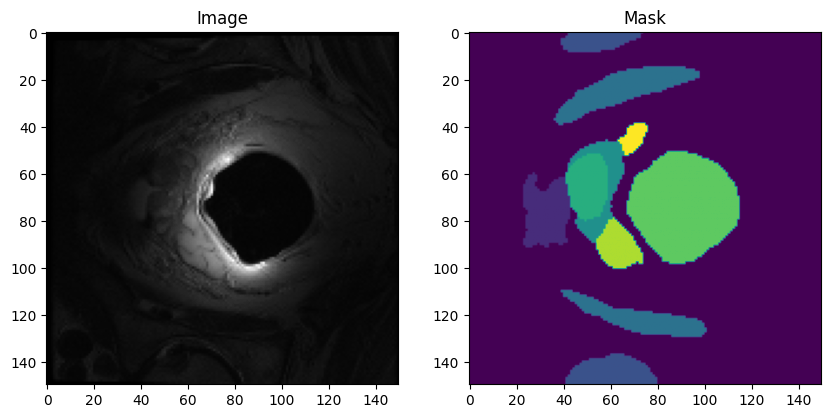

38


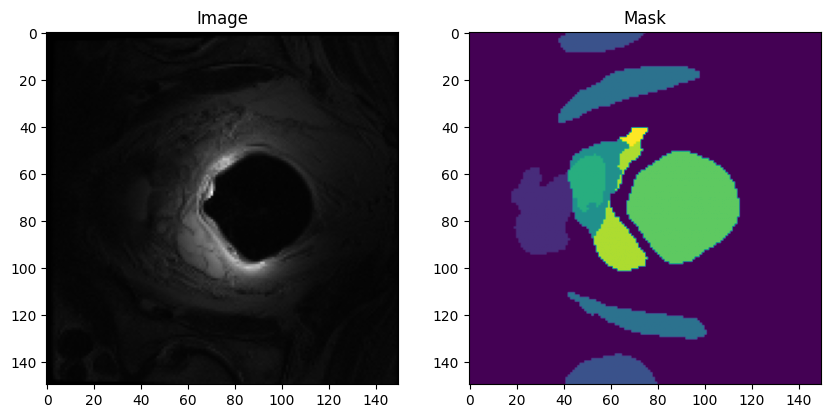

[36, 37, 38]


In [97]:
f_mask = 397

# Read the first image and mask
image = nib.load(train_images[f_mask]).get_fdata()
mask = nib.load(train_masks[f_mask]).get_fdata()

# Convert to tensors
image = torch.from_numpy(image)
mask = torch.from_numpy(mask)
#mask.unique().shape


#Function to display image and mask
def display_image_and_mask(image, mask, slice):
    fig, ax = plt.subplots(1, 2, figsize = (10, 5))
    ax[0].imshow(image[:, :, slice], cmap = "gray")
    ax[0].set_title("Image")
    ax[1].imshow(mask[:, :, slice])
    ax[1].set_title("Mask")
    plt.show()

full_slices = []
for i in range(mask.shape[2]):
    msk = mask[:, :, i]
    if torch.unique(msk).shape[0] == 9:
        print(i)
        full_slices.append(i)
        display_image_and_mask(image, mask, i)


print(full_slices)


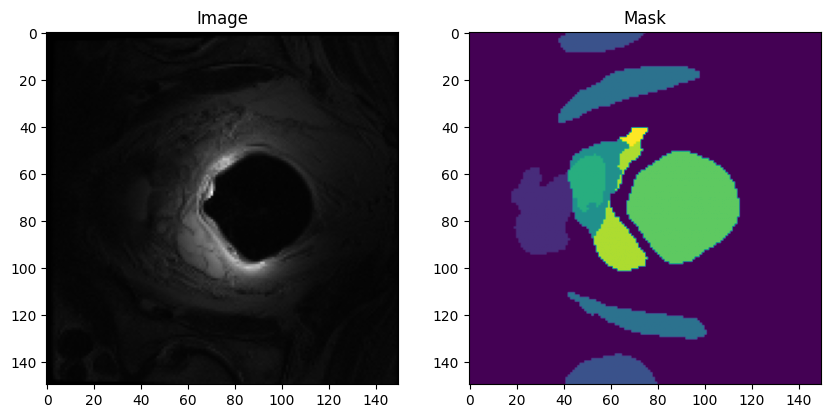

In [92]:
display_image_and_mask(image, mask, 38)

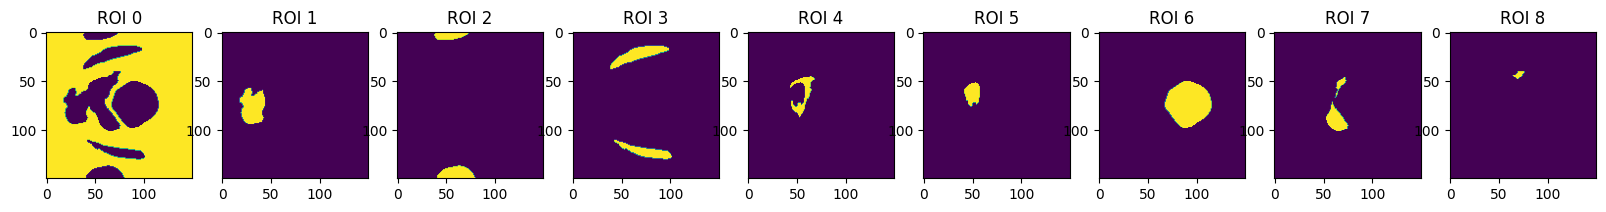

In [98]:
# Plot all ROIs
def plot_all_ROIs(mask, slice):
    fig, ax = plt.subplots(1, 9, figsize = (20, 7))
    for roi in range(9):
        ax[roi].imshow(mask[:, :, slice] == roi)
        ax[roi].set_title(f"ROI {roi}")
    plt.show()

plot_all_ROIs(mask, 38)

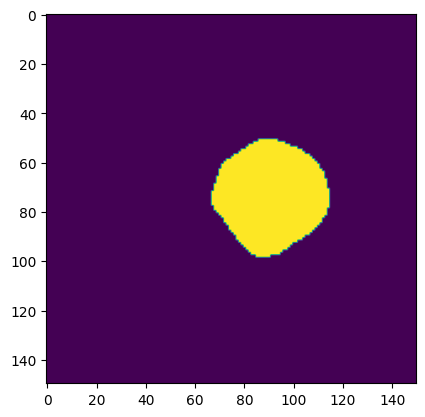

In [106]:
# Narrow down t0 ROI 6 for all slices
mask_roi_6 = mask == 6
plt.imshow(mask_roi_6[:, :, 38])

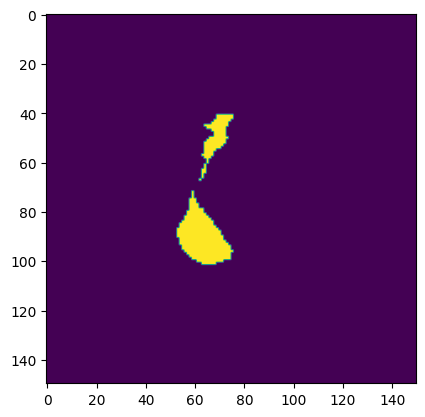

In [99]:
# Display R0I 7 and 8
roi_7_8 = (mask[:, :, 38] == 7) | (mask[:, :, 38] == 8)
plt.imshow(roi_7_8)

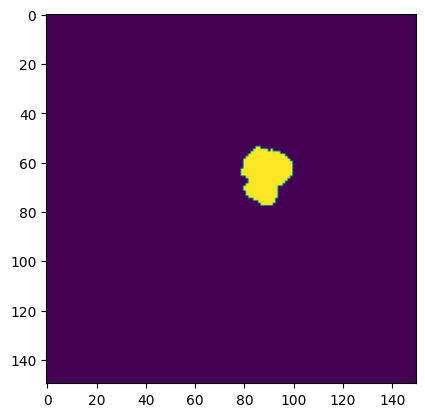

In [ ]:


# # Plot the image and mask
# fig, ax = plt.subplots(1, 2, figsize = (10, 5))
# ax[0].imshow(image[:, :, 0], cmap = "gray")
# ax[0].set_title("Image")
# ax[1].imshow(mask[:, :, 0])
# ax[1].set_title("Mask")
# plt.show()

# Create function to display image and mask


# Convert the image and mask to tensors
# image = torch.from_numpy(image)
# mask = torch.from_numpy(mask)

#